# Level Based Persona

**Lavel Based Persona:** Seviye tabanlı Persona Tanımlama

**Basit Segmentasyon**

*Pazarlama dilinde persona kavram girişimin başarılı olabilmesi adına çeşitli kaynaklardan bilgi edinerek çıkarılan ideal müşteri profili olarak açıklanır. Türkçede kimlik kartı ya da kişilik kartı olarak da kullanılan persona pazarlama çalışmalarında başarıyı yakalamanın temellerinden biridir. Pazarlama faaliyetleri sırasında yapılan analizler ile elde edilen bulguların birleştirilmesi sonucunda ortaya konan müşteri profili tamamen hayali bir karakter oluşturma işlemidir.*


Çalışmanın amacı: frimanın sahip olduğu müşterilerin bazı özelliklerini kullanarak ideal  müşteri(persona) tanımları yaparak tanımlanan yeni müşteri kavramına göre, müşterileri segmentlere ayırmaktır. Ve yeni gelen bir müşterinin hangi segmentte olabileceğini belirlemeye çalışmaktır.


Elimizde müşterilerin kişisel bilgileirni barındıran users tablosu ve mişterilerin satın alma bililerini barındıran Purchase tablusu bulunmaktadır.
### Users tablosu
* **uid:** Müşterilerin idleri
* **reg_date:** Müşterinin kayıt tarihi
* **device:** Müşterinin kullandığı ürünün tipi
* **gender:** Müşteirnin cnisiyeti
* **country:** Müşteirnin ülkesi
* **age:** Müşterinin yaşı

### Purchase tablosu
* **date:** Müşterinin satın alma yaptığı tarih
* **uid:** Müşterilerin idleri
* **price:** Müşterinin ödediği ücret

### Gerekli Kütüphaelerin eklenmesi ve Veri setlerinin okunması

In [216]:
# Temel dataframe işlemleri
import pandas as pd
# Görselleştirme
import seaborn as sns
import matplotlib.pyplot as plt
# Uyarlıarı göz ardı et
import warnings
warnings.filterwarnings("ignore")

In [217]:
users = pd.read_csv("users.csv")
purchases  = pd.read_csv("purchases.csv")

In [218]:
users.head()

,uid,reg_date,device,gender,country,age
0,54030035,2017-06-29T00:00:00Z,and,M,USA,19
1,72574201,2018-03-05T00:00:00Z,iOS,F,TUR,22
2,64187558,2016-02-07T00:00:00Z,iOS,M,USA,16
3,92513925,2017-05-25T00:00:00Z,and,M,BRA,41
4,99231338,2017-03-26T00:00:00Z,iOS,M,FRA,59


In [219]:
purchases.head()

,date,uid,price
0,2017-07-10,41195147,499
1,2017-07-15,41195147,499
2,2017-11-12,41195147,599
3,2017-09-26,91591874,299
4,2017-12-01,91591874,599


In [220]:
# Firmanın kayıtlı 10000 tane müşerisi vardır
# Toplamda eldeki veri setinde 9006 adet satış gerçekleşmiştir.
print(users.shape)
print(purchases.shape)

(10000, 6)
(9006, 3)


In [221]:
# Kaç farklı müşteirnin işlem yaptığına bakalım
purchases["uid"].nunique() # 1332
purchases["uid"].value_counts()

67972857    28
41217161    28
82914310    26
83611817    25
44628001    25
            ..
41045336     1
23543063     1
97470516     1
20737349     1
50813295     1
Name: uid, Length: 1322, dtype: int64

**9006 adet işlemi uniq müşteri sayısının 1332 olduğunu görmekteyiz. Yani bazı müşteriler birden fazla işlem yapmıştır. Örneğin üstteki çıktıya baktığımıda hangi müşterilerin kaç kez saın alma yaptığını görebilmekteyiz. Mesela 67972857 id li müşteri 28 kez işlem yapmıştır.**

## Satış ve Kullanıcı (Purchase ve Users ) tablolarının birleştirilmesi ve Analiz Edilmesi

* Satış verileri ile kullnaıcı verileri birleştirilerek kullanıcların satış durumlarına göre segmentlere ayırma işlem için gerekli işlemleri yapmış oluyoruz
* Birleştirme işlemini satın alma yapmış müşterilere göre yapmaktayız. Çünkü segmentasyonu satış verilrine göre yapacağız
* Users veri setinde 10000 gözlem var. Bu da demek oluyor ki firmanın 10000 müşterisi vardır. Ve puchase veri setinde 9006 gözlem vardır. Bu da 9006 adet satın alma yapılddığını gösteriyor. Dolayısı ile iki veri setini Purchase tablosuna göre birleştireceğim
* Elde ettiğim veriyi görselleştirme ve tnımlayıcı istatistiklerle  inceleyeceğim

In [222]:
# Tablları birleştirme
df = purchases.merge(users, how="inner", on="uid")
df.shape

(9006, 8)

In [223]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9006 entries, 0 to 9005
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      9006 non-null   object
 1   uid       9006 non-null   int64 
 2   price     9006 non-null   int64 
 3   reg_date  9006 non-null   object
 4   device    9006 non-null   object
 5   gender    9006 non-null   object
 6   country   9006 non-null   object
 7   age       9006 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 633.2+ KB


In [224]:
# Yaş değişkenini kategorilere ayıralaım,  
df["Age_CAT"]=pd.cut(df["age"], bins =[0,18,24,30,51,df["age"].max()],labels=["0_18","19_24","25_30","31_50","51+"])

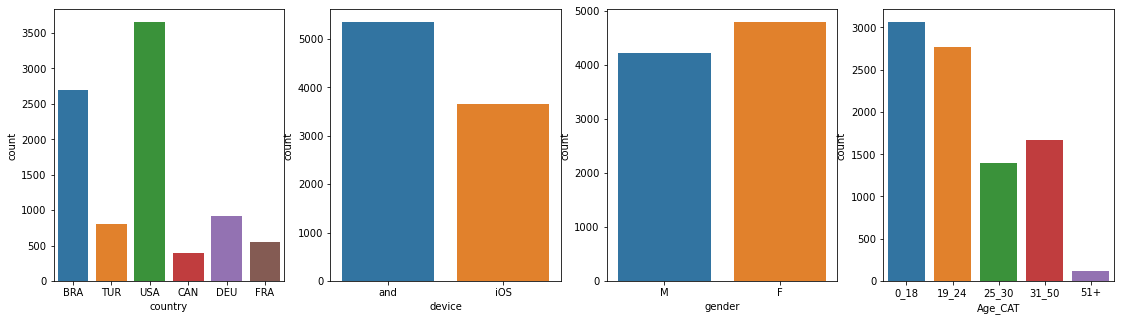

In [225]:
#Kategoriklerin incelenmesi
fig, axes = plt.subplots(1, 4, figsize=(19, 5))
cat_var =["country","device","gender","Age_CAT"]
for i in range(4):
     sns.countplot(ax=axes[i],data=df, x= cat_var[i])


In [226]:
df[["age","price"]].describe().T

,count,mean,std,min,25%,50%,75%,max
age,9006.0,23.922274,9.044646,15.0,17.0,21.0,28.0,75.0
price,9006.0,406.772596,187.918230,99.0,299.0,299.0,499.0,899.0


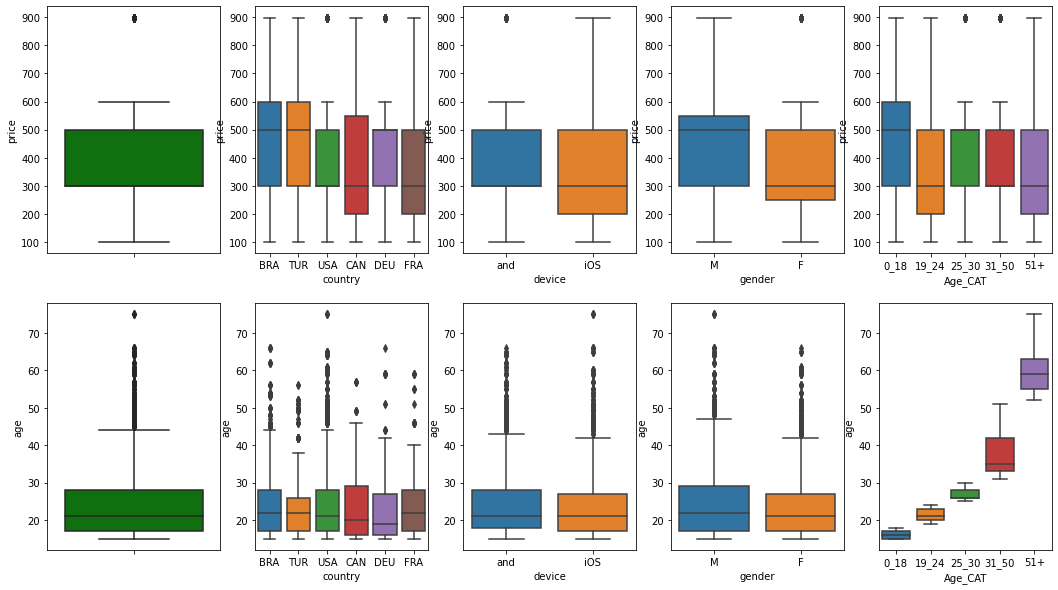

In [227]:
# Yaş ve Price değişkenlerinin kategoriklere göre boxplotları
fig, axes = plt.subplots(2, 5, figsize=(18, 10))
cat_var =["country","device","gender","Age_CAT"]
num_var =["price","age"]
for i in range(2):
    for k in range(4):
        sns.boxplot(ax=axes[i,k+1],data=df, x= cat_var[k], y=num_var[i])
    sns.boxplot(ax=axes[i,0], data=df, y=num_var[i], color="g")
  


**Grafilera bakığımızda, price değişkeni ülkelere , dvicelere ve cinsiyet ve yaş kategorileri değişkenine göre farklılıklar göstermektedir Bu bizim için persona tanımlarken büyük ölçüde yol gösterici olmaktadır**

## Kategorik Kırılımlara Göre Price'ın incelenmesi ve Personaların tanımlanması

**Fiyatı ülkelerin cihazların ve cinsiyetin ve yaşın kırılımında incelemeye çalışalım**

#### ADIM1
**Veriyi Ülkelere göre kırıp price değişkeninin ortalamasına bakalım**

In [228]:
df.groupby(["country"]).agg({"price":["mean","count"]})

price      
               mean count
country                  
BRA      409.838901  2694
CAN      398.248120   399
DEU      409.054645   915
FRA      401.757353   544
TUR      415.417910   804
USA      403.712329  3650

#### ADIM2
**Veriyi Ülkeler + Cihazlara göre kırıp price değişkeninin ortalamasına bakalım**

In [229]:
df.groupby(["country","device"]).agg({"price":["mean","count"]})


price      
                      mean count
country device                  
BRA     and     412.985594  1666
        iOS     404.739300  1028
CAN     and     406.826087   230
        iOS     386.573964   169
DEU     and     402.474903   518
        iOS     417.639798   397
FRA     and     418.377163   289
        iOS     382.921569   255
TUR     and     433.913793   464
        iOS     390.176471   340
USA     and     399.000000  2178
        iOS     410.684783  1472

#### ADIM3
**Veriyi Ülkeler + Cihazlar + Cinsiyete göre kırıp price değişkeninin ortalamasına bakalım**

In [230]:
df.groupby(["country","device","gender"]).agg({"price":["mean","count"]}).head(50)


price      
                             mean count
country device gender                  
BRA     and    F       410.503417   878
               M       415.751269   788
        iOS    F       402.455285   492
               M       406.835821   536
CAN     and    F       384.507246   138
               M       440.304348    92
        iOS    F       380.081081    74
               M       391.631579    95
DEU     and    F       393.237288   295
               M       414.695067   223
        iOS    F       421.377622   286
               M       408.009009   111
FRA     and    F       424.308642   162
               M       410.811024   127
        iOS    F       365.393443   122
               M       399.000000   133
TUR     and    F       411.734082   267
               M       463.974619   197
        iOS    F       399.473934   211
               M       374.968992   129
USA     and    F       390.541353  1064
               M       407.078995  1114
        iOS    F       409.099751   802
               M       412.582090   670

#### ADIM4
**Veriyi Ülkeler + Cihazlar + Cinsiyete + Yaş Kategorsine göre kırıp price değişkeninin ortalamasına bakalım**

In [231]:
df.groupby(["country","device","gender","Age_CAT"]).agg({"price":["mean","count"]}).sort_values(("price","mean"), ascending=False)

price      
                                     mean count
country device gender Age_CAT                  
CAN     and    M      0_18     499.000000    20
TUR     and    M      0_18     484.185185    54
CAN     and    M      25_30    474.000000     8
USA     and    F      51+      474.000000     4
FRA     and    F      31_50    472.333333    15
...                                   ...   ...
                      51+             NaN     0
        iOS    F      51+             NaN     0
TUR     and    M      51+             NaN     0
        iOS    F      51+             NaN     0
               M      51+             NaN     0

[120 rows x 2 columns]

**Veriyi ülke, cihaz, cinsiyet ve yaş kırılımında derleyerek 9006 adet alışveriş işleminden  nihayetinde 120 adet persona ortaya çıkarmış olduk. Bunu tam olarak oluşturmak için şimdi işlemlere devam edelim. yapılan kırılımlar sonucu oluşan veryi   fiyata göre sıralayalım ve kaydedelim**

In [232]:
agg_df = df.groupby(["country","device","gender","Age_CAT"]).agg({"price":"mean"}).sort_values("price", ascending=False)

In [233]:
agg_df.head()

,,,,price
country,device,gender,Age_CAT,
CAN,and,M,0_18,499.000000
TUR,and,M,0_18,484.185185
CAN,and,M,25_30,474.000000
USA,and,F,51+,474.000000
FRA,and,F,31_50,472.333333


In [234]:
# oluşan personalar için artık bir indeks atadım
agg_df.reset_index(inplace =True)
agg_df.head()

,country,device,gender,Age_CAT,price
0,CAN,and,M,0_18,499.000000
1,TUR,and,M,0_18,484.185185
2,CAN,and,M,25_30,474.000000
3,USA,and,F,51+,474.000000
4,FRA,and,F,31_50,472.333333


**Elde edilen veriye şimdi bakalım. Nihayetinde, Ülkeler(6)-->Cihaz(2)-->Cinsiyert(2)-->YaşKategorsi(5) olacak şekilde veride personalara erişmişt olduk** 

### Persona İsimlerini Oluşturma ve Son halini kaydetme

In [235]:
# Kırılımları tanımlayacak şekilde her bir personaya isim oluşturma
agg_df["customer_lavel_based"] = [row[0]+"_"+row[1].upper()+"_"+row[2]+"_"+row[3] for row in agg_df.values]
agg_df.head()

,country,device,gender,Age_CAT,price,customer_lavel_based
0,CAN,and,M,0_18,499.000000,CAN_AND_M_0_18
1,TUR,and,M,0_18,484.185185,TUR_AND_M_0_18
2,CAN,and,M,25_30,474.000000,CAN_AND_M_25_30
3,USA,and,F,51+,474.000000,USA_AND_F_51+
4,FRA,and,F,31_50,472.333333,FRA_AND_F_31_50


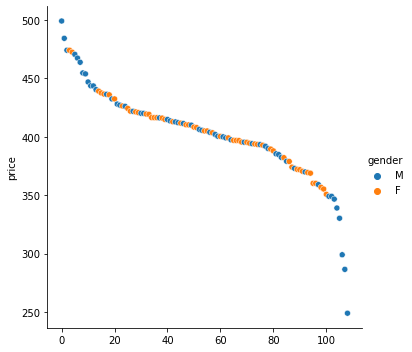

In [236]:
sns.relplot(agg_df.index,agg_df["price"], hue=agg_df["gender"])

In [237]:
# Persona isimleri ve fiyatlrı barındıran son halini kaydediyoruz.
agg_df.dropna(inplace=True)
persona_df = agg_df[["customer_lavel_based","price"]]
persona_df.head()

,customer_lavel_based,price
0,CAN_AND_M_0_18,499.000000
1,TUR_AND_M_0_18,484.185185
2,CAN_AND_M_25_30,474.000000
3,USA_AND_F_51+,474.000000
4,FRA_AND_F_31_50,472.333333


In [238]:
persona_df.describe()

,price
count,109.000000
mean,403.105165
std,38.632112
min,249.000000
25%,385.363636
50%,404.925926
75%,421.727273
max,499.000000


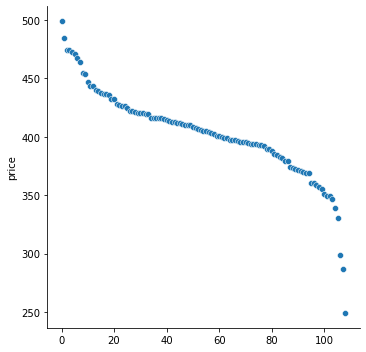

In [239]:
# Fiyatın personalara göre dağılımı
sns.relplot(persona_df.index,persona_df["price"])

## Personaları Fiyatlara Göre Segmentlere Ayırma
**Bu Aşamada Fiyat aralıklarına göre her bir tanımlanan yeni müşteriyi(Persona) segmentlere atayacağız. Fiyat arağını 4e bölerek en iyi fiyat aralığına A segmenti en düşük fiyat aralığına ise D segmenti atayazağız.**

array([[<AxesSubplot:title={'center':'price'}>]], dtype=object)

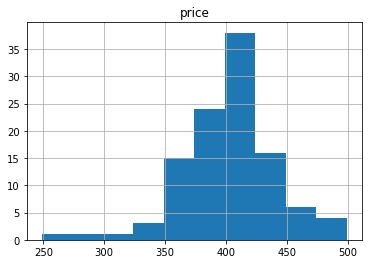

In [240]:
# Personaların Dağılımına bakalım
persona_df.hist()

**Histograma baktığımıda normal dağılıma yakın davrandığını görüyorum. Ama biraz büyük değerlerin frekansının yüksek olduğunu görüyproum bu sebeple manule olarak 249-350,350-400,400-450 ve 450-500 arasında segmentlere ayıracağım**

In [241]:
persona_df["Segment"] = pd.cut(persona_df["price"], bins=[persona_df["price"].min()-1,350,400,450,persona_df["price"].max()], labels=["D","C","B","A"])

In [242]:
persona_df.head()

,customer_lavel_based,price,Segment
0,CAN_AND_M_0_18,499.000000,A
1,TUR_AND_M_0_18,484.185185,A
2,CAN_AND_M_25_30,474.000000,A
3,USA_AND_F_51+,474.000000,A
4,FRA_AND_F_31_50,472.333333,A


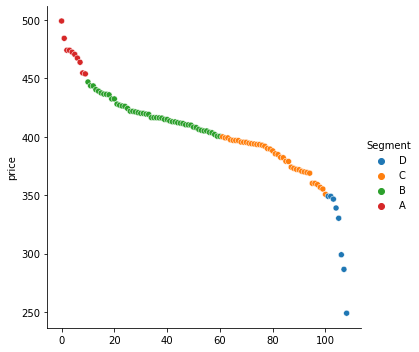

In [243]:
sns.relplot(persona_df.index,"price", data =persona_df, hue="Segment")

<AxesSubplot:xlabel='Segment', ylabel='count'>

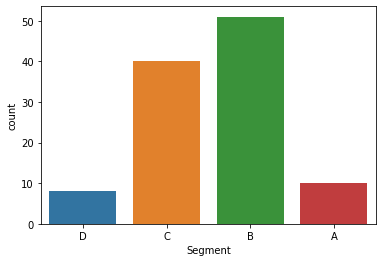

In [244]:
sns.countplot(persona_df["Segment"])

# **Sonuç Olarak: Müşterilerin satın alma bilgilerinden yararlanarak, müşterileri ülke+cihaz+cinsiyet+yaş kategorosi krılımında gruplayarak yeni bir persona tanımlamış olduk. Böylelikle yeni gelen bir müşterinin bu kategorilerine bakarak ortalama bir price tahmininde bulunabileceğim ve müşteriyi bir segmente koyabileceğim**

**Bir örnek ile bunu pekiştilerim. Örneğin Türkiyeden, android kullanıcısı 27 yaşında bir bayanın *(TUR_AND_F_25_30)* ortalama ne kadar para bırakacağına bakacak olursak;**

In [245]:
persona_df[persona_df["customer_lavel_based"]=="TUR_AND_F_25_30"]

,customer_lavel_based,price,Segment
34,TUR_AND_F_25_30,416.391304,B


# **Görüldüğü üzere özellikleri söylenen müşteri ortalama 416 birim para bırakması bekleniyor ve B segmentine bulunuyor. İş kararıyla segmentler bazdında bir aksiyon kararı belrilenmiş olsaydı, gerekli aksiyonu alırdık**